<a href="https://colab.research.google.com/github/swinshu/cqf-deep-dive/blob/main/CQF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# import plotly as plt
import matplotlib.pyplot as plt
import scipy.optimize as optimize
plt.rcParams["figure.figsize"] = (10, 7.5)



In [ ]:
full_df = pd.read_csv('USO Historical Data-2.csv')

In [ ]:
full_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 29, 2022",77.16,78.78,79.67,76.94,6.10M,-1.18%
1,"Apr 28, 2022",78.08,76.28,78.23,75.86,6.85M,2.24%
2,"Apr 27, 2022",76.37,75.12,76.61,74.87,4.48M,-0.12%
3,"Apr 26, 2022",76.46,75.33,76.94,74.37,7.33M,2.42%
4,"Apr 25, 2022",74.65,72.64,74.99,71.98,5.07M,-2.18%


In [ ]:
full_df = full_df[::-1]


In [ ]:
# calculating RSI

df = pd.DataFrame().assign(Date = full_df['Date'], Price = full_df['Price'])
window = 14

df['Diff'] = df['Price'].diff()
df['Gain'] = df['Diff'].clip(lower=0).round(2)
df['Loss'] = df['Diff'].clip(upper=0).abs().round(2)

df['Avg_Gain'] = df['Gain'].rolling(window=window, min_periods=window).mean()[:window + 1]
df['Avg_Loss'] = df['Loss'].rolling(window=window, min_periods=window).mean()[:window + 1]

# get WMS averages
# average gains
for i, row in enumerate(df['Avg_Gain'].iloc[window + 1:]):
    df['Avg_Gain'].iloc[i + window + 1] = (df['Avg_Gain'].iloc[i + window] * (window - 1) + \
                                           df['Gain'].iloc[i + window + 1]) / window
# average losses
for i, row in enumerate(df['Avg_Loss'].iloc[window + 1:]):
    df['Avg_Loss'].iloc[i + window + 1] = (df['Avg_Loss'].iloc[i + window] * (window - 1) + \
                                           df['Loss'].iloc[i + window + 1]) / window

# calculating RSI step 1, step 2
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
df['RSI'] = 100 - (100 / (1.0 + df['RS']))

print(df.head(20))
    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


              Date  Price  Diff  Gain  Loss  Avg_Gain  Avg_Loss        RS  \
1283  May 01, 2017  81.20   NaN   NaN   NaN       NaN       NaN       NaN   
1282  May 02, 2017  79.36 -1.84  0.00  1.84       NaN       NaN       NaN   
1281  May 03, 2017  79.44  0.08  0.08  0.00       NaN       NaN       NaN   
1280  May 04, 2017  75.68 -3.76  0.00  3.76       NaN       NaN       NaN   
1279  May 05, 2017  77.28  1.60  1.60  0.00       NaN       NaN       NaN   
1278  May 08, 2017  77.36  0.08  0.08  0.00       NaN       NaN       NaN   
1277  May 09, 2017  76.56 -0.80  0.00  0.80       NaN       NaN       NaN   
1276  May 10, 2017  78.88  2.32  2.32  0.00       NaN       NaN       NaN   
1275  May 11, 2017  79.52  0.64  0.64  0.00       NaN       NaN       NaN   
1274  May 12, 2017  79.60  0.08  0.08  0.00       NaN       NaN       NaN   
1273  May 15, 2017  81.36  1.76  1.76  0.00       NaN       NaN       NaN   
1272  May 16, 2017  80.88 -0.48  0.00  0.48       NaN       NaN       NaN   

<Figure size 720x540 with 0 Axes>

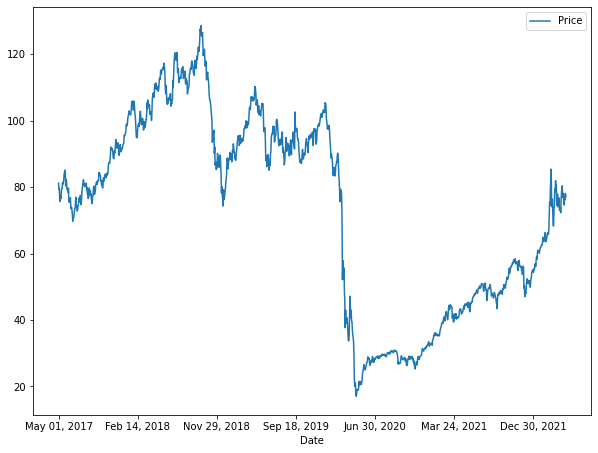

<Figure size 720x540 with 0 Axes>

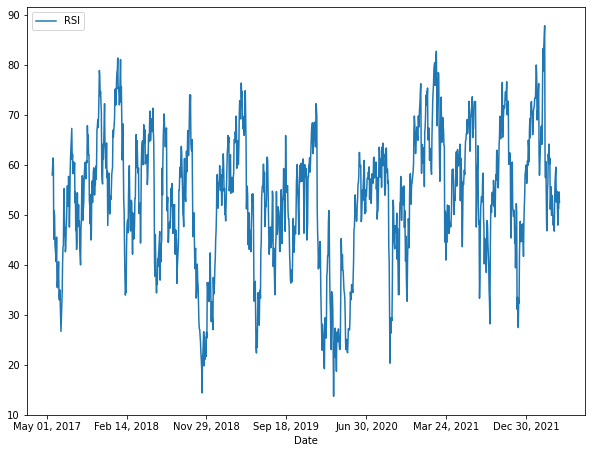

In [ ]:
plt.figure()
df.plot('Date', 'Price')
plt.figure()
df.plot('Date', 'RSI')

In [ ]:
# if RSI > 70, we expect price to drop so we want to sell
# if RSI < 30, we expect price to rise so we want to buy
